In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pr-dataset/parkinsons (2).csv


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
parkinsons = pd.read_csv("/kaggle/input/pr-dataset/parkinsons (2).csv")
#this will load the data from the csv file to pandas dataframe

In [89]:
parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
# number of rows and columns in the dataframe
parkinsons.shape

(195, 24)

In [10]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [11]:
# checking for missing values in each column
parkinsons.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
parkinsons.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
parkinsons['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [14]:
#parkinsons.groupby('status').mean()
# grouping the data based on the target variable, considering only numeric features
numeric_features = parkinsons.select_dtypes(include=np.number)
parkinsons.groupby('status')[numeric_features.columns].mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.678750,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.053027,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>],
       [<Axes: title={'center': 'spread2'}>,
   

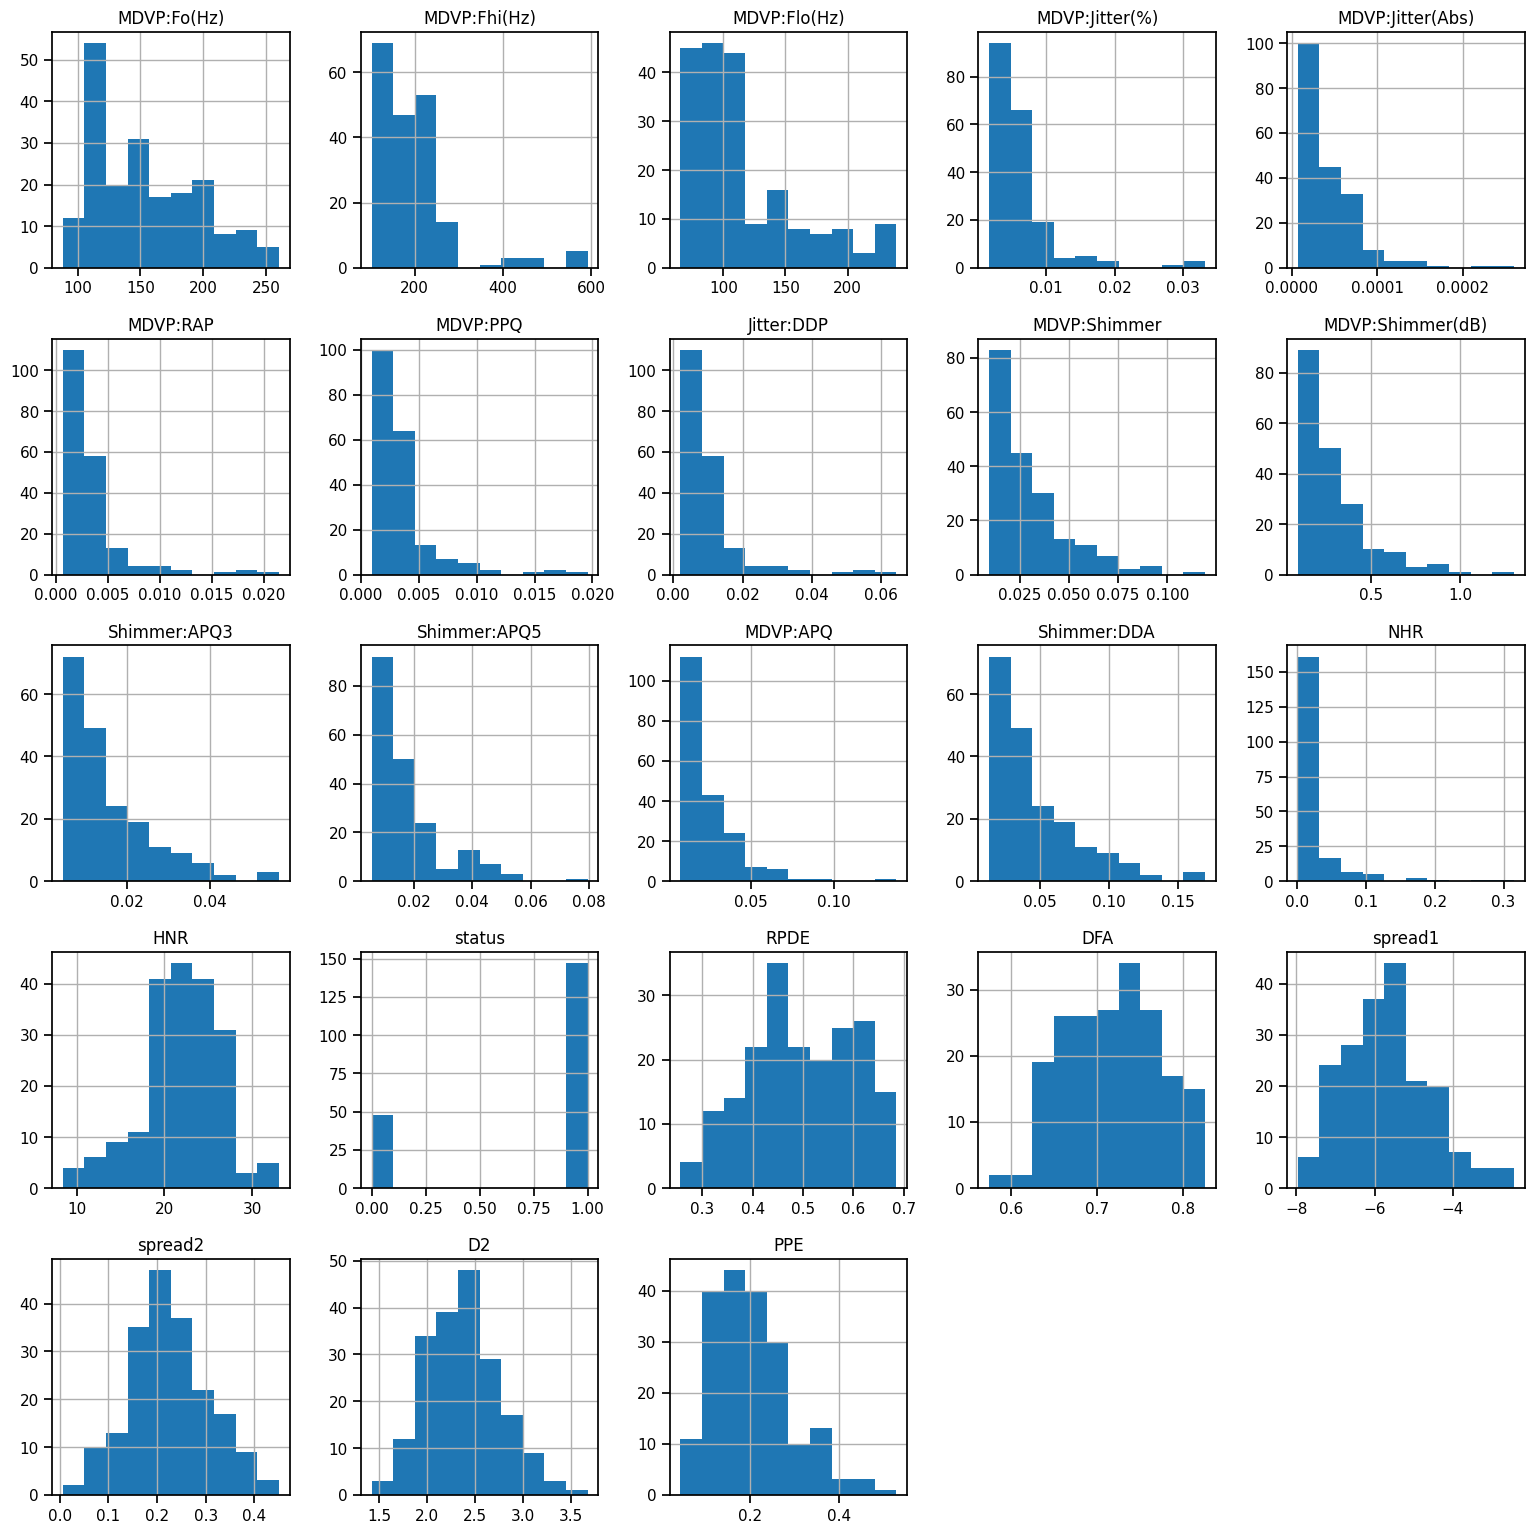

In [95]:
parkinsons.hist(figsize=(19,19))

<Axes: >

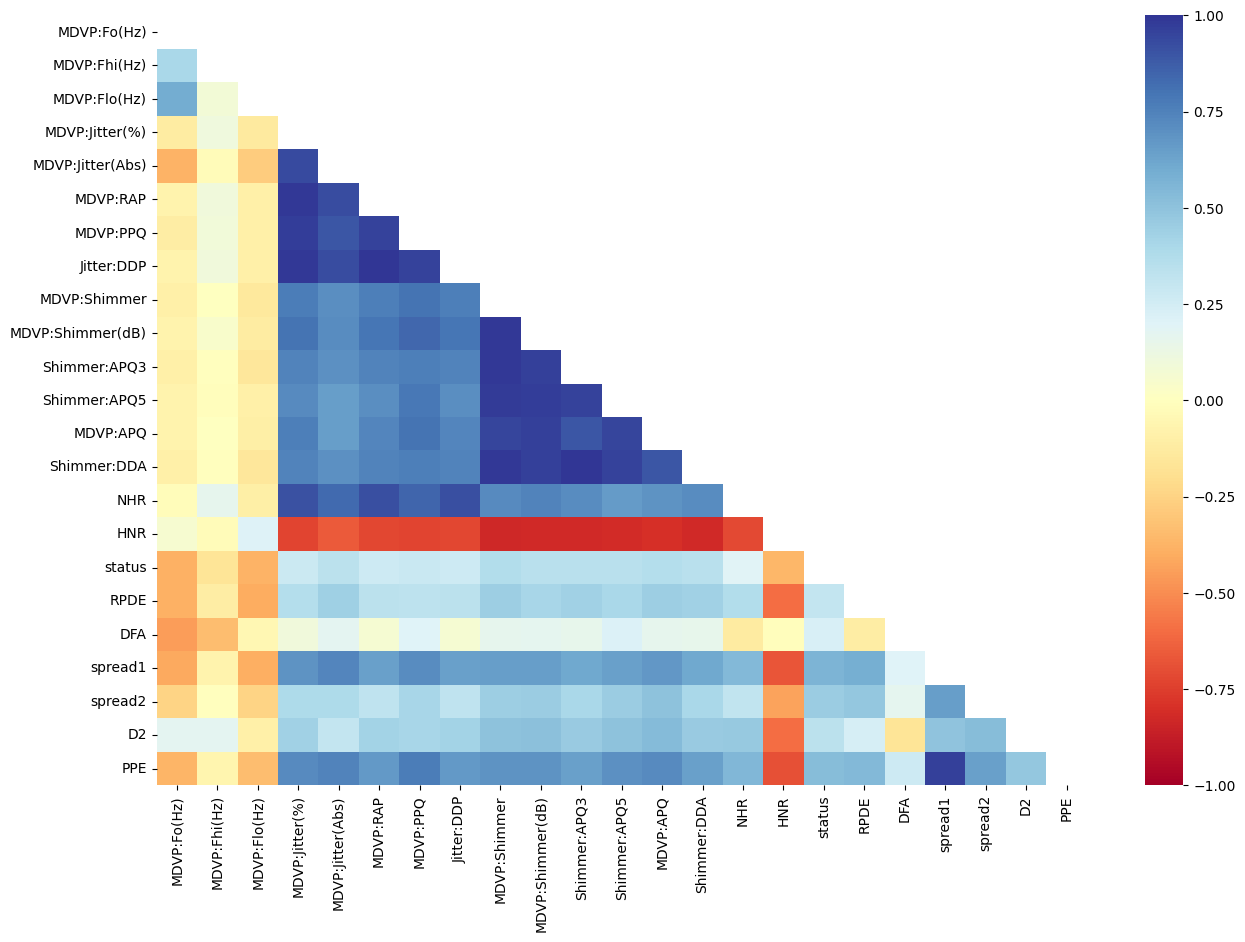

In [16]:
plt.figure(figsize=(15, 10))

# Select only numeric features for correlation analysis
numeric_features = parkinsons.select_dtypes(include=np.number)

mask = np.triu(np.ones_like(numeric_features.corr(), dtype=bool))

# Generate heatmap
sns.heatmap(numeric_features.corr(), vmin=-1, vmax=1, cmap='RdYlBu', mask=mask)

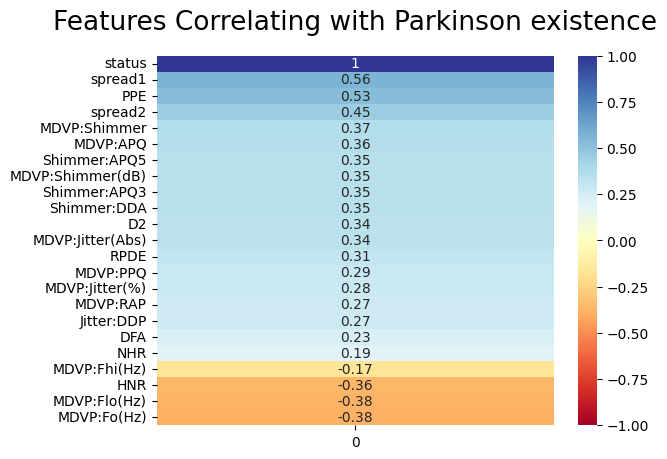

In [17]:
numeric_features = parkinsons.select_dtypes(include=np.number)

# Calculate correlation on numeric columns with 'status'
correlation_with_status = numeric_features.corrwith(parkinsons['status'])

# Sort the correlations
sorted_correlations = correlation_with_status.sort_values(ascending=False)

heatmap = sns.heatmap(sorted_correlations.to_frame(), vmin=-1, vmax=1, annot=True, cmap='RdYlBu') # Convert Series to DataFrame for heatmap
heatmap.set_title('Features Correlating with Parkinson existence', fontdict={'fontsize':19}, pad=19);

In [18]:
y_target=parkinsons['status']
y_target.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [19]:
y_target.value_counts(normalize=True)

status
1    0.753846
0    0.246154
Name: proportion, dtype: float64

In [20]:
parkinsons_copy=parkinsons
x_=parkinsons_copy.drop(['name','status'],axis=1)
y_=parkinsons_copy["status"]

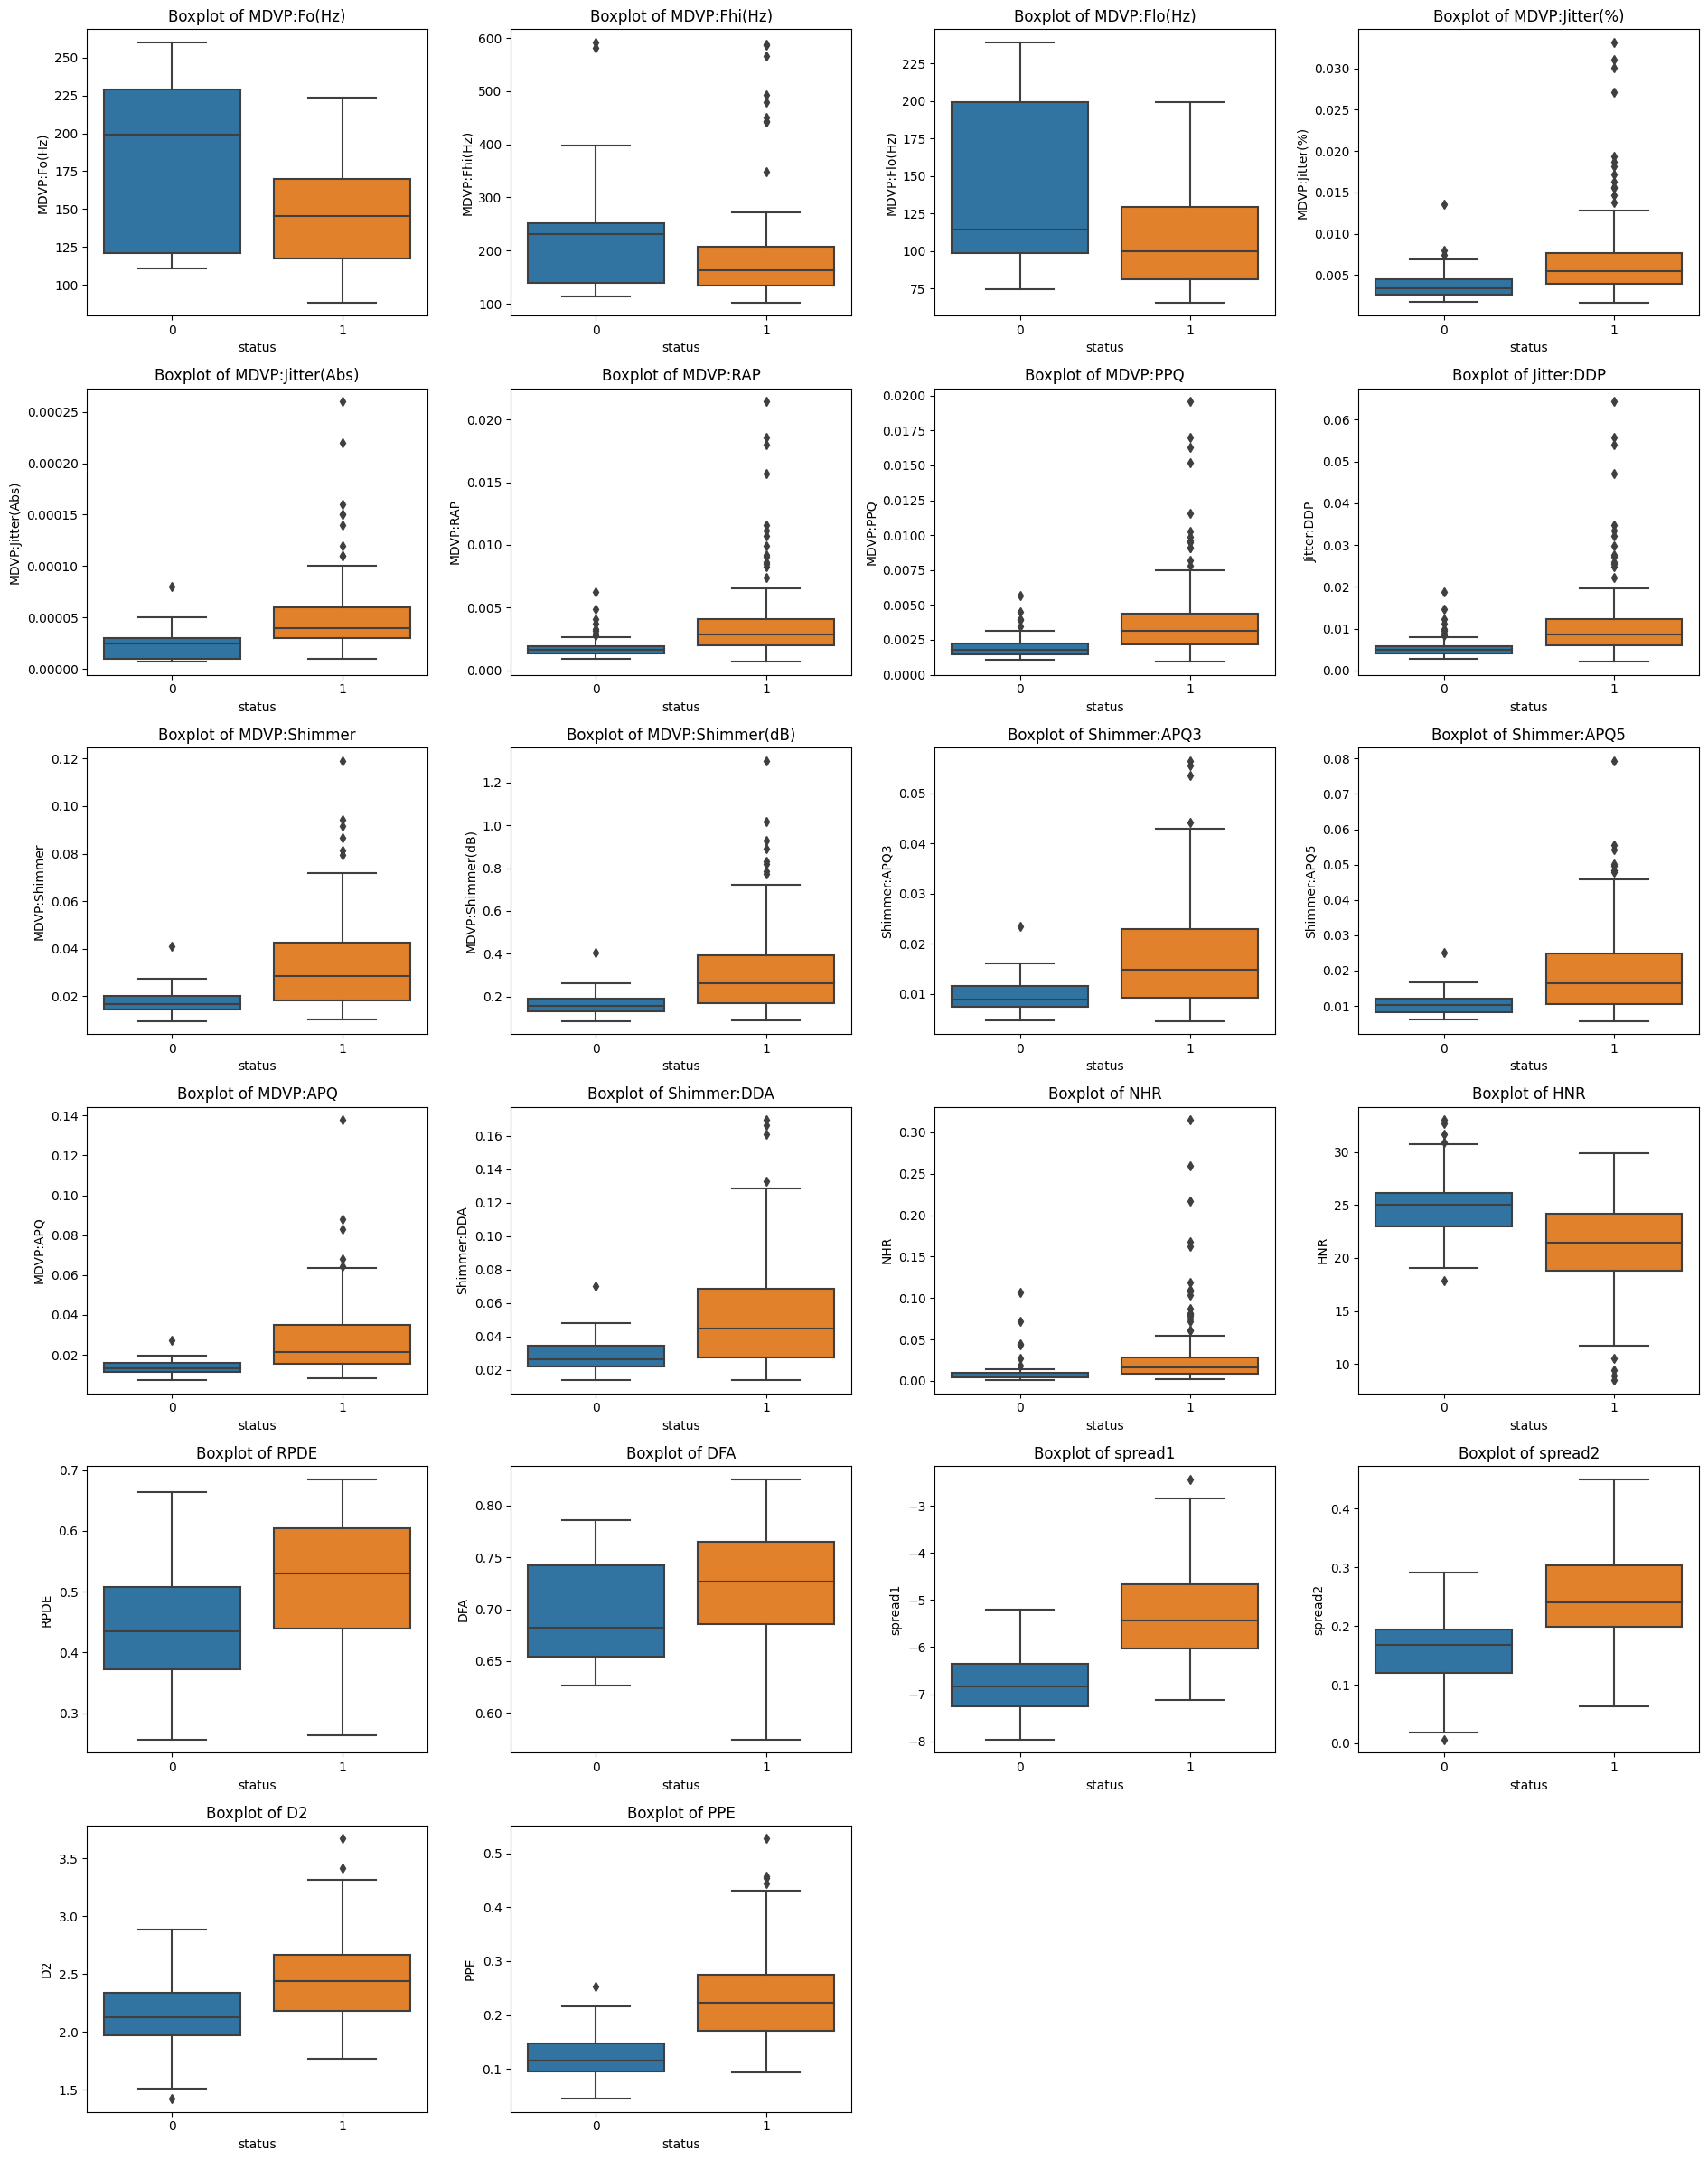

In [21]:
features= x_.columns

num_features = len(features)
num_cols = 4 
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(19, 4*num_rows))

for i, feature in enumerate(features):
    row_index = i // num_cols  # Calculate the row index for subplot
    col_index = i % num_cols   # Calculate the column index for subplot
    sns.boxplot(x=parkinsons['status'], y=parkinsons[feature], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Boxplot of {feature}')

# Hide empty subplots if necessary
for i in range(num_features, num_rows*num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


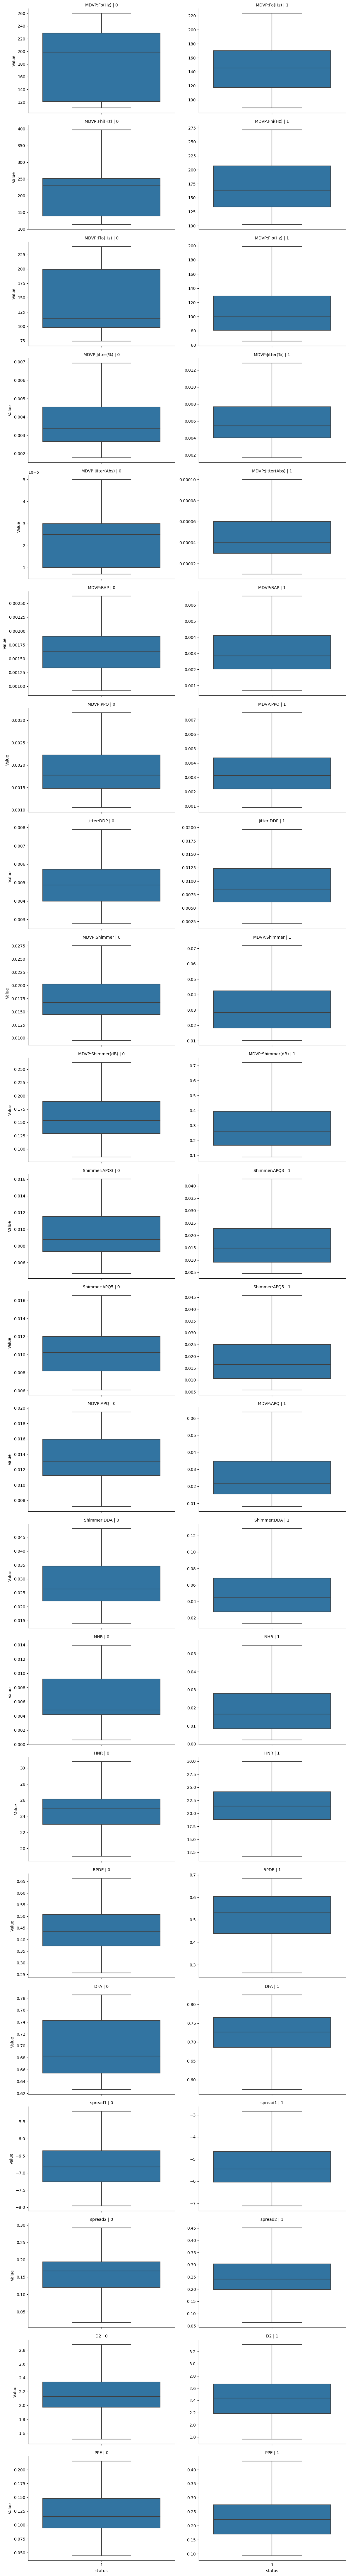

In [22]:
# Melt the DataFrame to long format
melted_data = pd.melt(parkinsons, id_vars=['status'], value_vars=x_.columns, var_name='Feature', value_name='Value')

# Create a FacetGrid with 'Feature' as rows and 'status' as columns
g = sns.FacetGrid(melted_data, row='Feature', col='status', sharey=False, height=4, aspect=1.5)  # Adjust height and aspect as needed

# Map box plots to the grid
g.map(sns.boxplot, 'status', 'Value', showfliers=False)  # showfliers=False to hide outliers if desired

# Add titles to each subplot
g.set_titles(row_template="{row_name}", col_template="{col_name}")

# Adjust layout and display
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

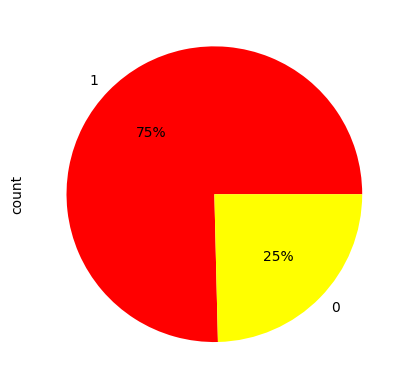

In [25]:
parkinsons['status'].value_counts().plot(kind='pie', autopct="%1.0f%%", colors=['red', 'yellow'])

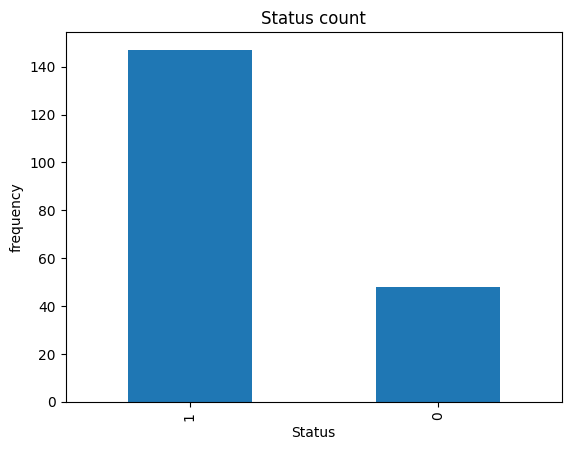

In [27]:
frequency=parkinsons['status'].value_counts()
frequency.plot(kind = "bar")
plt.title("Status count")
plt.xlabel("Status")
plt.ylabel("frequency")
plt.show()

In [28]:
#from imblearn.over_sampling import SMOTE

# ... (Your data loading and preprocessing steps) ...

# Assuming 'X' is your feature data and 'y' is your target variable ('status')
#smote = SMOTE(random_state=42) 
#X_resampled, y_resampled = smote.fit_resample(X, y)

# Now use X_resampled and y_resampled for model training

In [29]:
from imblearn.over_sampling import RandomOverSampler
Sample = RandomOverSampler(sampling_strategy = 0.6)
X_sam,Y_sam=Sample.fit_resample(x_,y_)

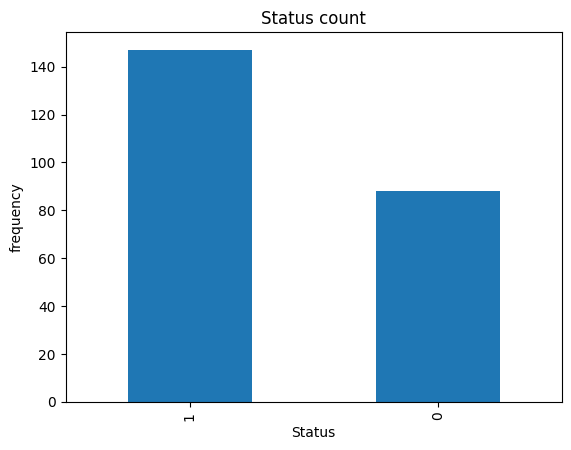

In [30]:
Y_sam19 = pd.DataFrame(Y_sam, columns=['status']) # Converting Y_sam19 to DataFrame with 'status' column
frequency=Y_sam19['status'].value_counts()
frequency.plot(kind = "bar")
plt.title("Status count")
plt.xlabel("Status")
plt.ylabel("frequency")
plt.show()

<Axes: ylabel='count'>

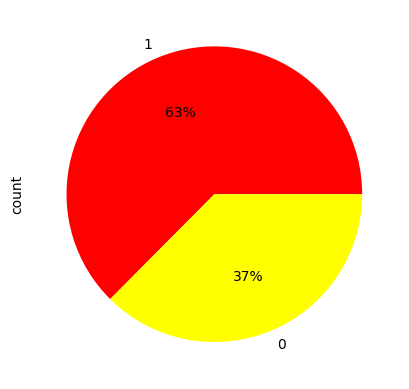

In [31]:
Y_sam19['status'].value_counts().plot(kind='pie', autopct="%1.0f%%", colors=['red', 'yellow'])

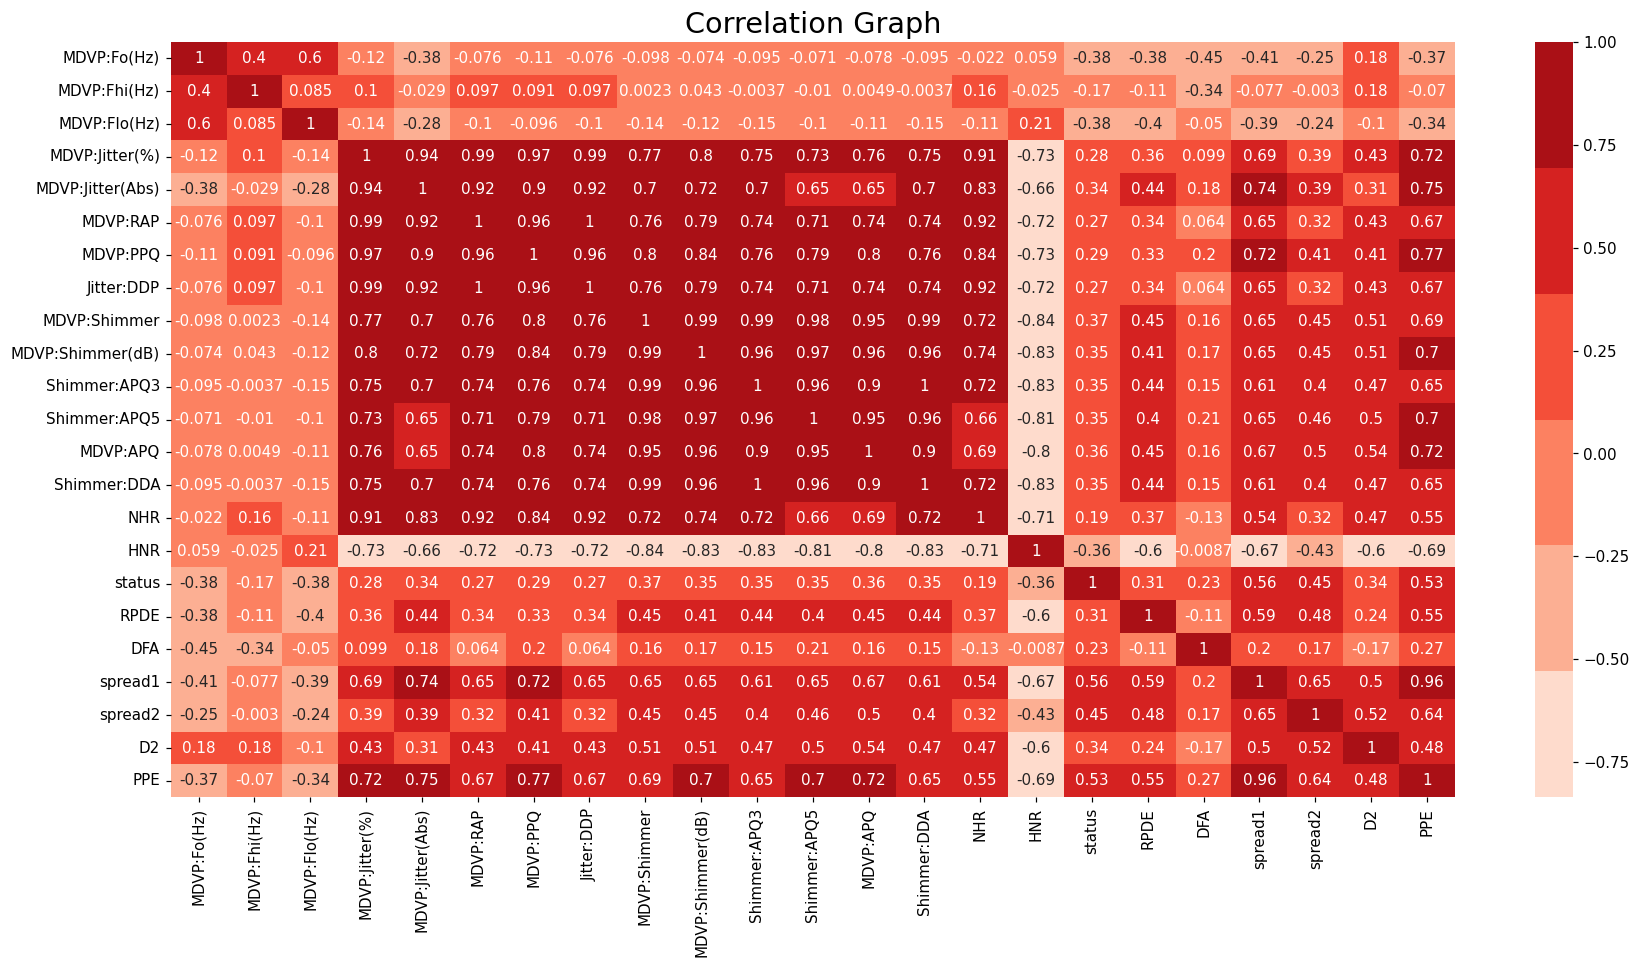

In [32]:
plt.figure(figsize=[19, 9], dpi=109)
plt.title("Correlation Graph", fontsize=19)

numerical=parkinsons.drop('name', axis=1)

cmap = sns.color_palette("Reds")

sns.heatmap(numerical.corr(), annot=True, cmap=cmap)

plt.show()

<Axes: ylabel='PPE'>

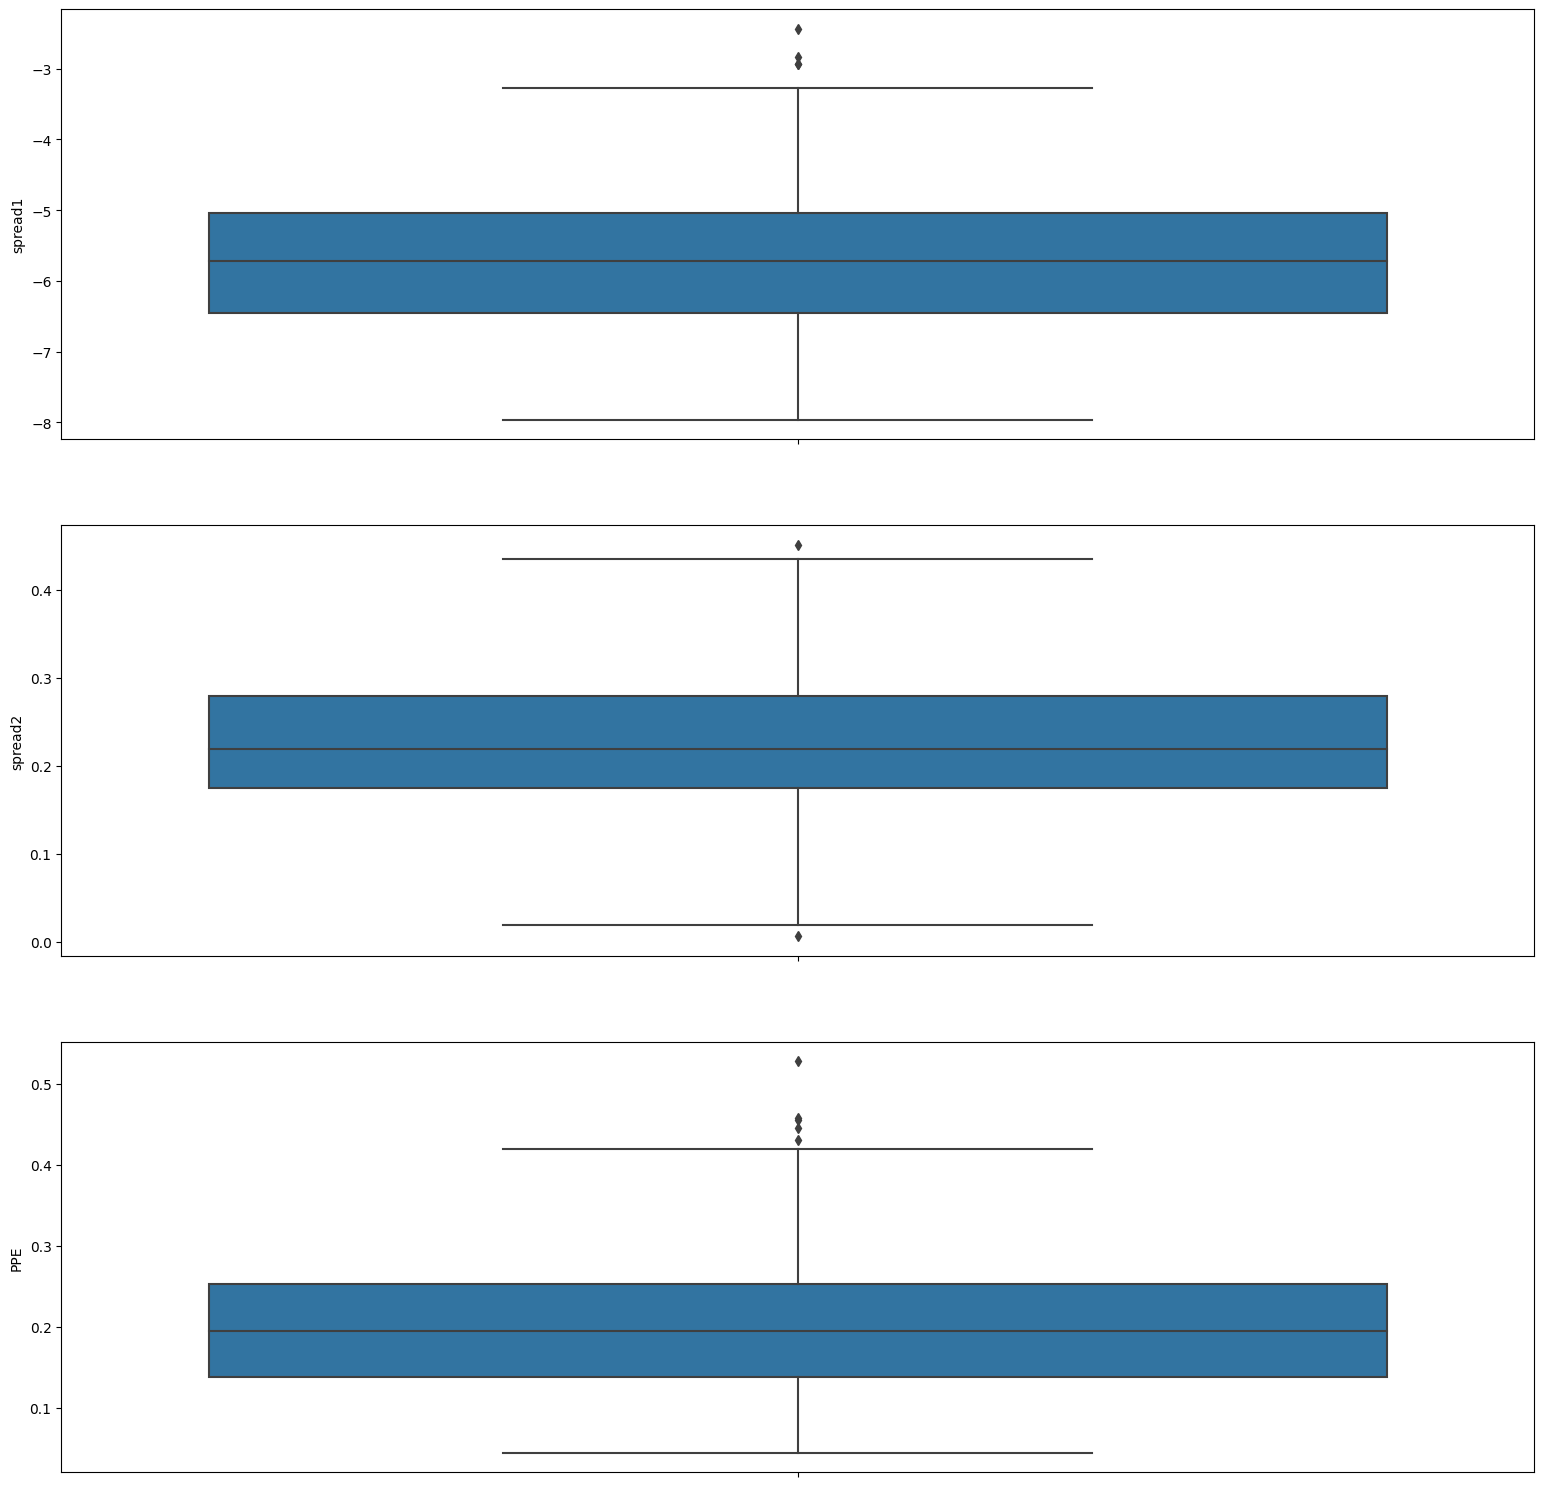

In [33]:
fig, ax = plt.subplots(3,1,figsize=(19,19))
sns.boxplot(y='spread1',data=parkinsons_copy, ax=ax[0],orient='v')
sns.boxplot(y='spread2',data=parkinsons_copy, ax=ax[1],orient='v')
sns.boxplot(y='PPE',data=parkinsons_copy,ax=ax[2],orient='v')
# shows the box plot of the frequency variation. All the three variations have outliers. Generally speaking, decision trees are able to handle outliers. It is very unlikely that decision tree will create a leaf to isolate them

/tmp/ipykernel_24/1287570934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( parkinsons_copy[parkinsons_copy.status == 0]['spread1'], color = 'r')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_24/1287570934.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

<Axes: xlabel='spread1', ylabel='Density'>

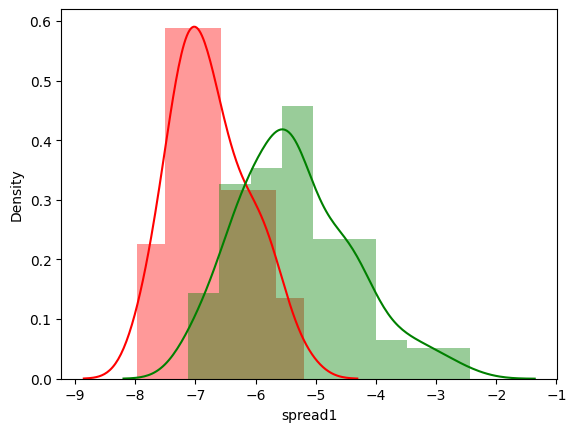

In [34]:
sns.distplot( parkinsons_copy[parkinsons_copy.status == 0]['spread1'], color = 'r')
sns.distplot( parkinsons_copy[parkinsons_copy.status == 1]['spread1'], color = 'g')
#Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD

<Axes: xlabel='status', ylabel='MDVP:Fo(Hz)'>

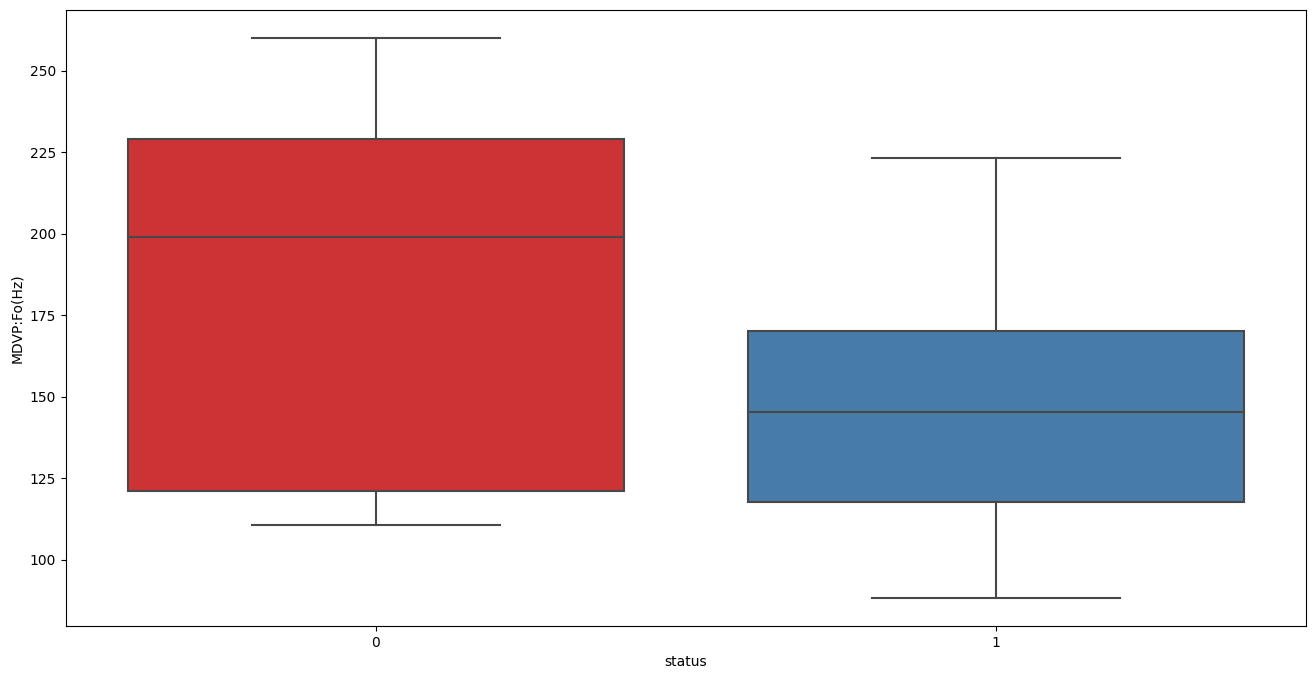

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.boxplot(x='status', y='MDVP:Fo(Hz)', data=parkinsons_copy, palette="Set1", ax=ax) # Changed ax[1] to ax
#When we look the relationship between status and MDVP:Fo(Hz) we can see the median value is around 199 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 145 Hz

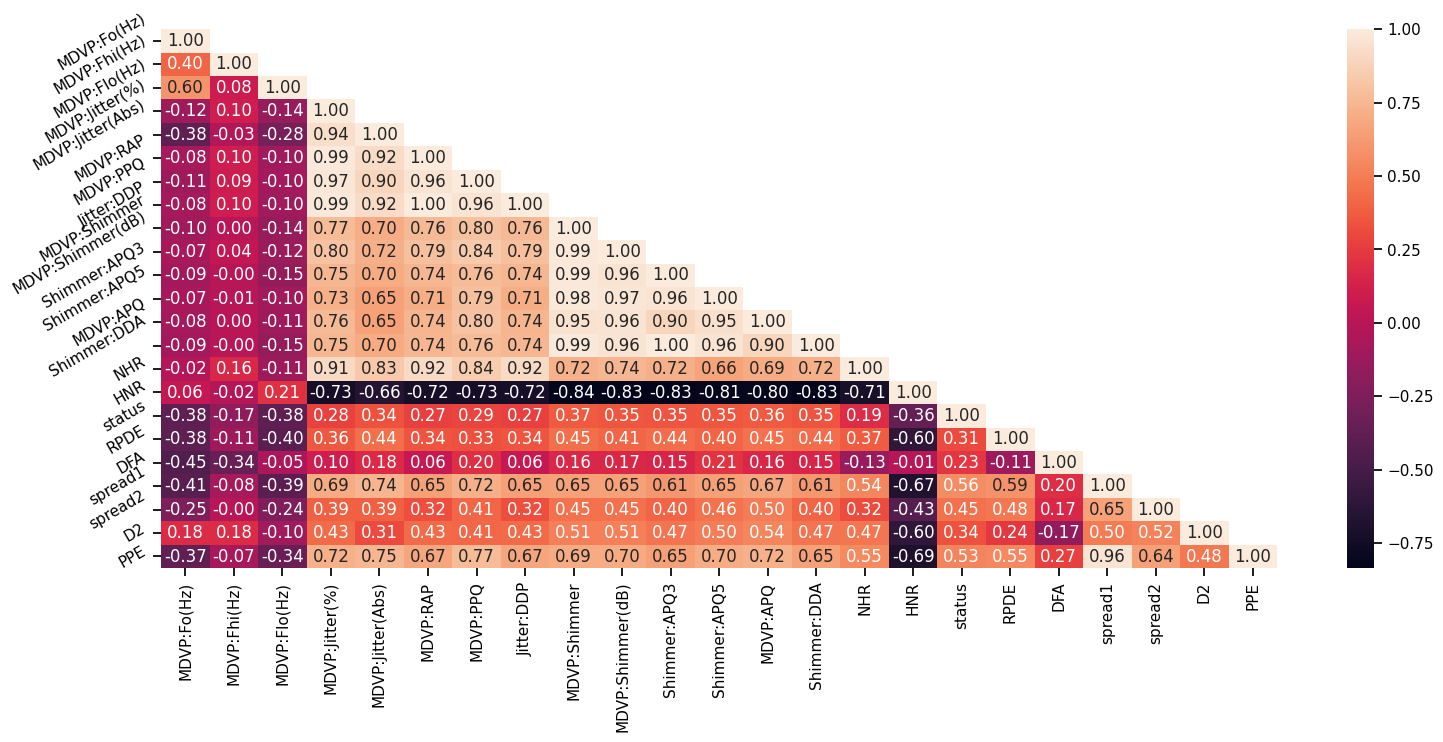

In [36]:
data_ = parkinsons_copy.drop('name',axis=1)

corr = data_.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
#MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. This may be because multi-dimensinal voice programs analysis is closely related with these variables The target variable status has a weak positive corelation with spread1

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

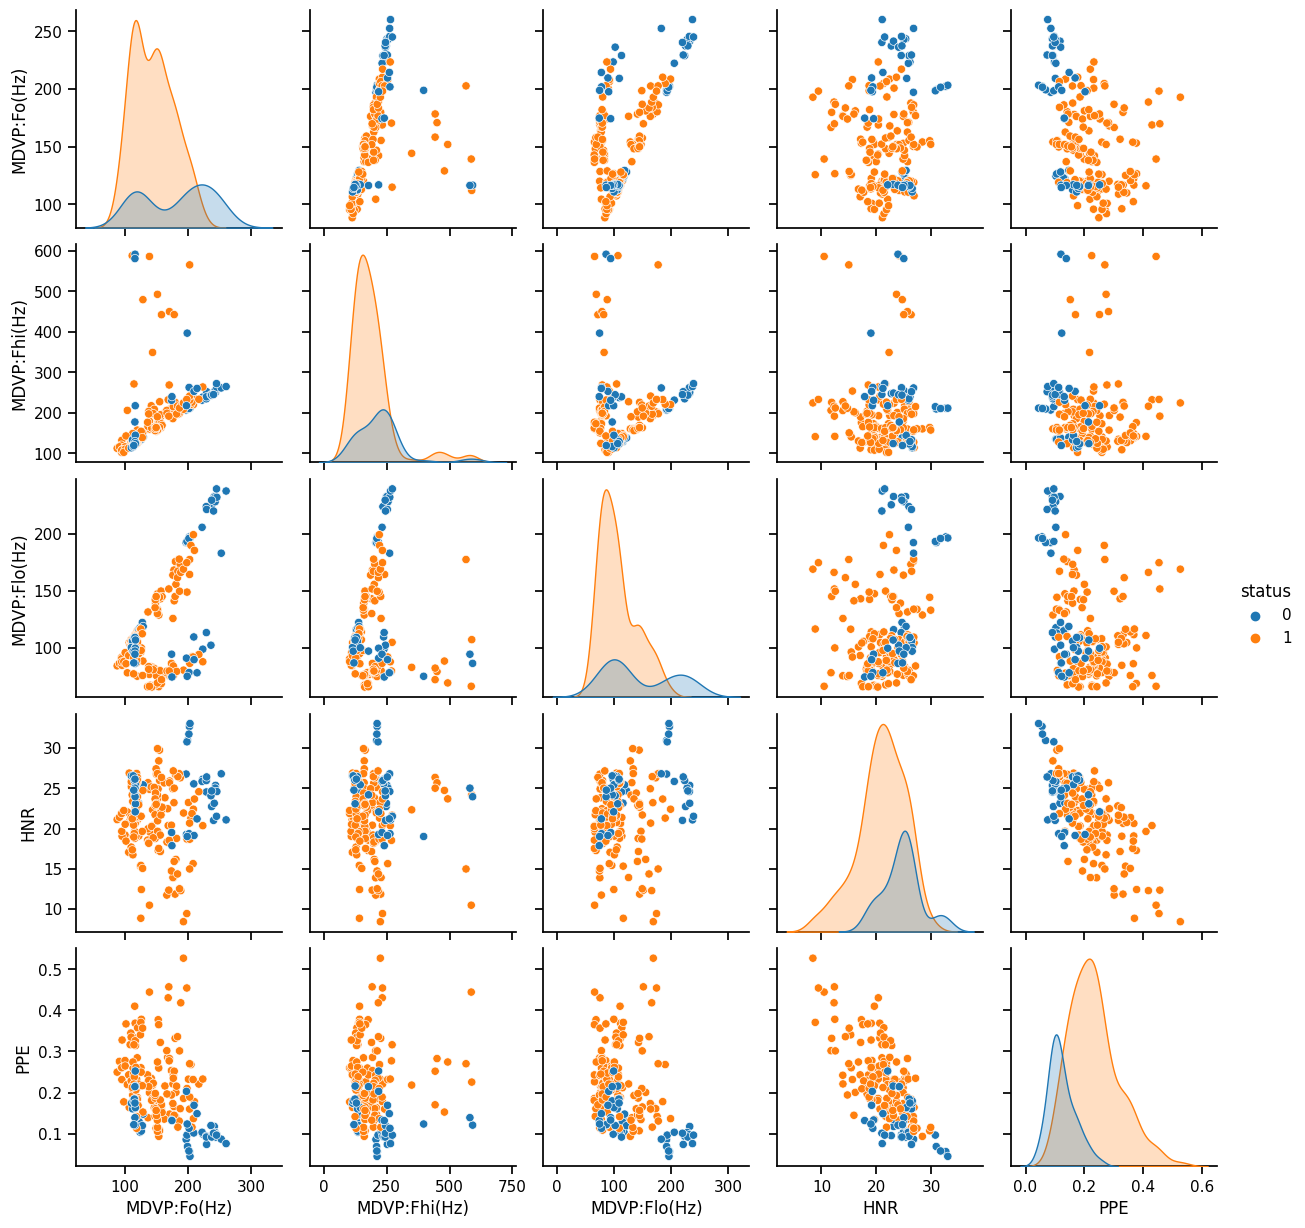

In [37]:
#Clear separations are visible in some features between the two classes
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR', 'PPE']
target_column = 'status'

sns.pairplot(data_[features + [target_column]], hue = target_column, diag_kind = "kde")
plt.show()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X_sam, Y_sam, test_size=0.2, random_state=2)

In [39]:
print(X_sam.shape, x_train.shape, x_test.shape)

(235, 22) (188, 22) (47, 22)


In [40]:
s_scaler = StandardScaler()

In [41]:
#fit help StandardScaler function to understand what is the nature of this data
s_scaler.fit(x_train)

StandardScaler()

In [42]:
x_train = s_scaler.transform(x_train)
x_test = s_scaler.transform(x_test)

In [43]:
print(x_train)
print('-----------------------------------------------------------------------')
print(x_test)

[[-0.44527192 -0.23215472 -1.1661371  ...  0.12759112  0.87743633
   0.52748971]
 [-0.06678085 -0.24048789 -1.10520043 ...  1.74545403  2.12250881
   1.97832826]
 [-0.63642262 -0.64384162 -0.18149992 ...  0.24123973 -0.56111383
   0.2432204 ]
 ...
 [-0.81446402 -0.63341971 -0.20196768 ...  1.39511856 -0.28898914
  -0.06387203]
 [-0.31352129  0.21235355 -0.7968902  ... -0.05079974 -0.28759664
   0.436931  ]
 [ 0.9430201   0.2142247  -0.63495097 ... -0.60610165  1.51813111
   0.09474599]]
-----------------------------------------------------------------------
[[-0.04859114 -0.35026599 -1.16545837 ...  0.58627225  1.13735396
   1.84842529]
 [ 1.05785113  4.00128068  1.19896043 ...  0.58283019  1.59219245
   0.82092064]
 [ 0.93183864  0.09748417  1.5128065  ... -0.44771849 -1.51918426
  -1.17115511]
 ...
 [-0.01434369  0.3203584  -0.8627264  ...  0.79577539 -0.19103919
  -0.92355387]
 [-0.43238944 -0.41414637  0.22367691 ... -0.74860027 -0.72580515
  -0.59984318]
 [ 0.14918224  0.00447032 

In [60]:
svm_model = svm.SVC(kernel='linear')

In [61]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

Features 'MDVP:Fo(Hz)' and 'MDVP:Fhi(Hz)' are potentially linearly separable.


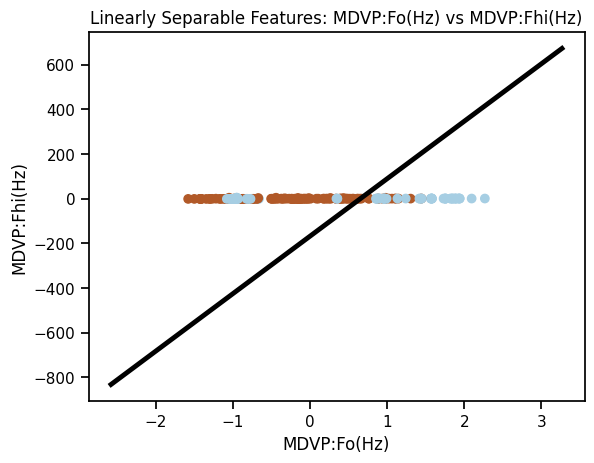

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC  # Import LinearSVC for separability check

# ... (Your data loading and preprocessing steps: X_sam, Y_sam) ...

# Assuming X_sam is a pandas DataFrame
feature_names = X_sam.columns.tolist()

# Iterate through pairs of features
for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        feature1 = feature_names[i]
        feature2 = feature_names[j]

        # Extract data for the selected features
        X_subset = X_sam[[feature1, feature2]].values
        y = Y_sam.values.ravel()  # Assuming Y_sam is a pandas Series

        # Scale the data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_subset)

        # Check for linear separability using LinearSVC
        clf = LinearSVC(random_state=0, tol=1e-5)
        clf.fit(X_scaled, y)

        # If the model converges (separable), plot the data and line
        if clf.coef_ is not None:  # Check if the model converged
            print(f"Features '{feature1}' and '{feature2}' are potentially linearly separable.")

            # Get the separating hyperplane
            w = clf.coef_[0]
            a = -w[0] / w[1]
            xx = np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 100)
            yy = a * xx - (clf.intercept_[0]) / w[1]

            # Plot the data and hyperplane
            plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired)
            plt.plot(xx, yy, 'k-')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title(f"Linearly Separable Features: {feature1} vs {feature2}")
            plt.show()
            
            # You can break the loop here if you've found a suitable pair
            break  
    else:
        continue  # Only execute else if the loop did NOT break
    break  # Break the outer loop as well

In [63]:
x_train_prediction = svm_model.predict(x_test)
training_data_accuracy = accuracy_score(y_test, x_train_predicti)
print('Accuracy score on training data : ', training_data_accuracy)

Accuracy score on training data :  0.8723404255319149


In [64]:
x_train_prediction = svm_model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score on training data : ', training_data_accuracy)

Accuracy score on training data :  0.8723404255319149


In [65]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model instance
lr_model = LogisticRegression(random_state=42) # You can adjust hyperparameters if needed

# Train the Logistic Regression model using the same training data
lr_model.fit(x_train, y_train.values.ravel()) # ravel() might be needed to avoid DataConversionWarning

# Make predictions on the test data
y_pred_lr = lr_model.predict(x_test)

# Evaluate the model's performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.8297872340425532


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [67]:
k_model = KNeighborsClassifier(n_neighbors=5)
k_model.fit(x_train, y_train)
k_model.score(x_test,y_test)

0.9148936170212766

In [68]:
y_pred = k_model.predict(x_test)

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)
y_pred = rfcl.predict(x_test)
rfcl.score(x_test , y_test)

0.8723404255319149

In [70]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

Misclassified samples in Random Forest: 6


In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)

In [74]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=100)

In [75]:
dt_model.score(x_test , y_test) 

0.8936170212765957

In [76]:
y_pred = dt_model.predict(x_test)

In [77]:
#Count mis-classified one
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 5


In [78]:
input_t=(214.28900,260.27700,77.97300,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.19000,0.01026,0.01161,0.01373,0.03078,0.04398,21.20900,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569)
input_t=np.asarray(input_t)
input_t_reshaped=input_t.reshape(1,-1)
std_data=s_scaler.transform(input_t_reshaped)
prediction = dt_model.predict(std_data)
print(prediction)
if (prediction[0]==0):
    print("The person does not have Parkinson's Disease")
else:
    print("The person has Parkinson's Disease")

[0]
The person does not have Parkinson's Disease


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [79]:
input_t=(214.28900,260.27700,77.97300,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.19000,0.01026,0.01161,0.01373,0.03078,0.04398,21.20900,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569)
input_t=np.asarray(input_t)
input_t_reshaped=input_t.reshape(1,-1)

feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 
                 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 
                 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 
                 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
# Create DataFrame with feature names for transformation
input_t_df = pd.DataFrame(input_t_reshaped, columns=feature_names) 

# Now transform using the loaded scaler
std_data = s_scaler.transform(input_t_df)



#std_data=s_scaler.transform(input_t_reshaped)
prediction = dt_model.predict(std_data)
print(prediction)
if (prediction[0]==0):
    print("The person does not have Parkinson's Disease")
else:
    print("The person has Parkinson's Disease")

[0]
The person does not have Parkinson's Disease


In [81]:
def return_prediction_for_single_datapoint(input_t):
    does_have_count = 0
    input_t = np.asarray(input_t)
    input_t_reshaped=input_t.reshape(1,-1)
    std_data=s_scaler.transform(input_t_reshaped)

    # decision tree
    prediction = dt_model.predict(std_data)
    if (prediction[0]==0):  
         print("Decision tree prediction: The person does NOT have Parkinson's Disease")
    else:
        does_have_count = does_have_count + 1
        print("Decision tree prediction: The person has Parkinson's Disease")


    # logistic regression
    prediction=lr_model.predict(std_data)
    if (prediction[0]==0):
        print("Logistic regression prediction: The person does NOT have Parkinson's Disease")
     else:
        does_have_count = does_have_count + 1
        print("Logistic regression prediction: The person has Parkinson's Disease")
     # svm 
     prediction = svm_model.predict(std_data)
     if (prediction[0]==0):
         print("Svm prediction: The person does NOT have Parkinson's Disease")
     else:
         does_have_count = does_have_count + 1
         print("Svm prediction: The person has Parkinson's Disease")

     # KNN
     prediction = k_model.predict(std_data)
     if (prediction[0]==0):
         print("KNN prediction: The person does NOT have Parkinson's Disease")
     else:
         does_have_count = does_have_count + 1
         print("KNN prediction: The person has Parkinson's Disease")

     # Random Forest
      prediction = rfcl.predict(std_data)
      if (prediction[0]==0):
            print("Random forest prediction: The person does NOT have Parkinson's Disease")
      else:
            does_have_count = does_have_count + 1
            print("Random forest prediction: The person has Parkinson's Disease")

      
        # final prediction
      if does_have_count >= 3:
          print("Final prediction: The person does have Parkinson's Disease")
      else:
          print("Final prediction: The person does NOT have Parkinson's Disease")
            
return_prediction_for_single_datapoint(148.14300,155.98200,135.04100,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.13100,0.00725,0.00876,0.01263,0.02175,0.00540,23.68300,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)

In [83]:
import numpy as np

def return_prediction_for_single_datapoint(*input_t):
    does_have_count = 0
    input_t = np.asarray(input_t)
    input_t_reshaped = input_t.reshape(1, -1)
    std_data = s_scaler.transform(input_t_reshaped)

    # Decision Tree
    prediction = dt_model.predict(std_data)
    if prediction[0] == 0:
        print("Decision tree prediction: The person does NOT have Parkinson's Disease")
    else:
        does_have_count += 1
        print("Decision tree prediction: The person has Parkinson's Disease")

    # Logistic Regression
    prediction = lr_model.predict(std_data)
    if prediction[0] == 0:
        print("Logistic regression prediction: The person does NOT have Parkinson's Disease")
    else:
        does_have_count += 1
        print("Logistic regression prediction: The person has Parkinson's Disease")

    # SVM
    prediction = svm_model.predict(std_data)
    if prediction[0] == 0:
        print("SVM prediction: The person does NOT have Parkinson's Disease")
    else:
        does_have_count += 1
        print("SVM prediction: The person has Parkinson's Disease")

    # KNN
    prediction = k_model.predict(std_data)
    if prediction[0] == 0:
        print("KNN prediction: The person does NOT have Parkinson's Disease")
    else:
        does_have_count += 1
        print("KNN prediction: The person has Parkinson's Disease")

    # Random Forest
    prediction = rfcl.predict(std_data)
    if prediction[0] == 0:
        print("Random forest prediction: The person does NOT have Parkinson's Disease")
    else:
        does_have_count += 1
        print("Random forest prediction: The person has Parkinson's Disease")


    print("......................................................")
    # Final Prediction
    if does_have_count >= 3:
        print("Final prediction: The person does have Parkinson's Disease")
    else:
        print("Final prediction: The person does NOT have Parkinson's Disease")

# Example usage
return_prediction_for_single_datapoint(
    148.14300, 155.98200, 135.04100, 0.00392, 0.00003, 0.00204, 
    0.00231, 0.00612, 0.01450, 0.13100, 0.00725, 0.00876, 
    0.01263, 0.02175, 0.00540, 23.68300, 0.398499, 0.778349, 
    -5.711205, 0.240875, 2.845109, 0.192730
)


Decision tree prediction: The person has Parkinson's Disease
Logistic regression prediction: The person has Parkinson's Disease
SVM prediction: The person has Parkinson's Disease
KNN prediction: The person has Parkinson's Disease
Random forest prediction: The person has Parkinson's Disease
......................................................
Final prediction: The person does have Parkinson's Disease


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


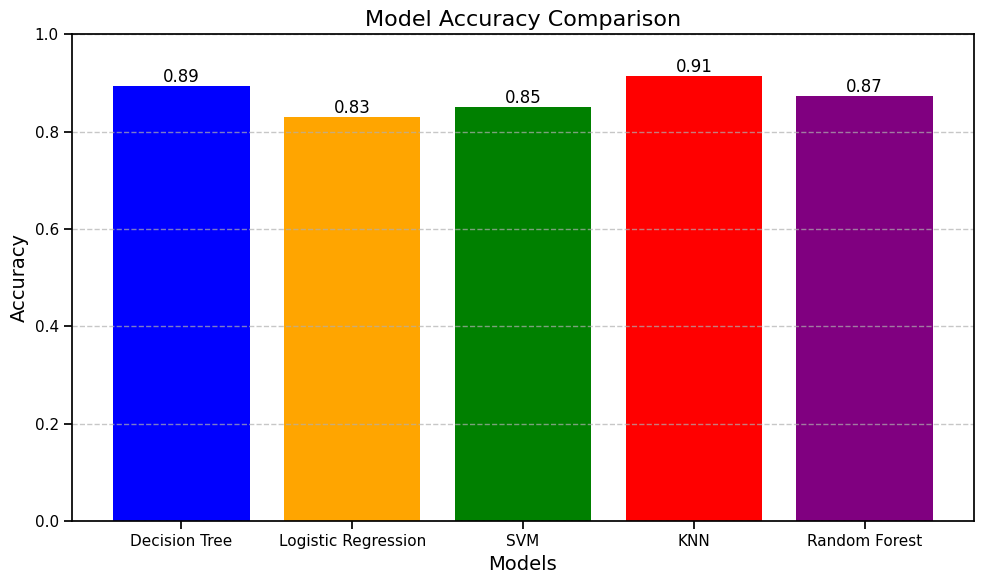

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Example accuracy scores for each model (replace these with your actual scores)
model_names = ['Decision Tree', 'Logistic Regression', 'SVM', 'KNN', 'Random Forest']
accuracy_scores = [dt_model.score(x_test , y_test),lr_model.score(x_test , y_test),svm_model.score(x_test , y_test),k_model.score(x_test , y_test),rfcl.score(x_test , y_test)]  # Replace with actual test scores

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=['blue', 'orange', 'green', 'red', 'purple'])

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Chart aesthetics
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()